1.0 1.0


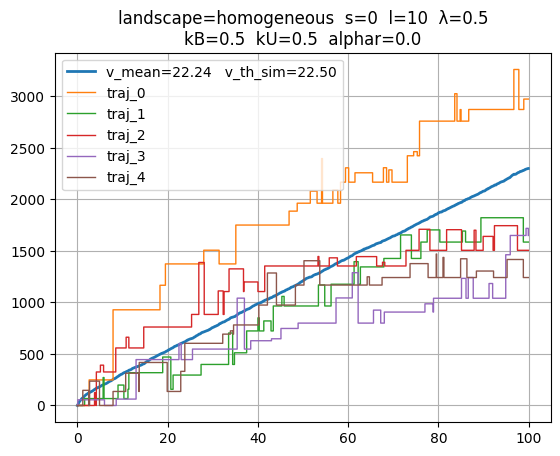

1.0 1.0


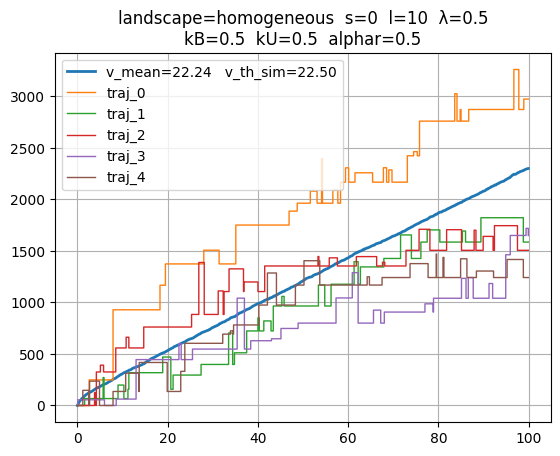

0.22222222222222648 0.2222222222222222


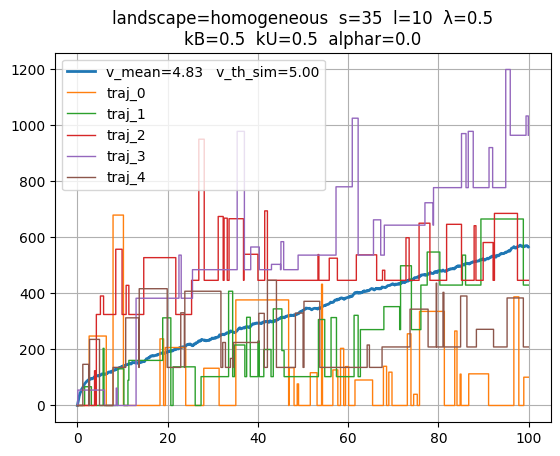

0.4166666666666715 0.4166666666666667


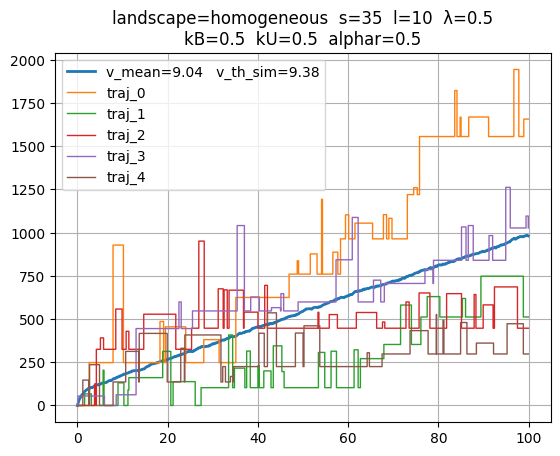

1.0 1.0


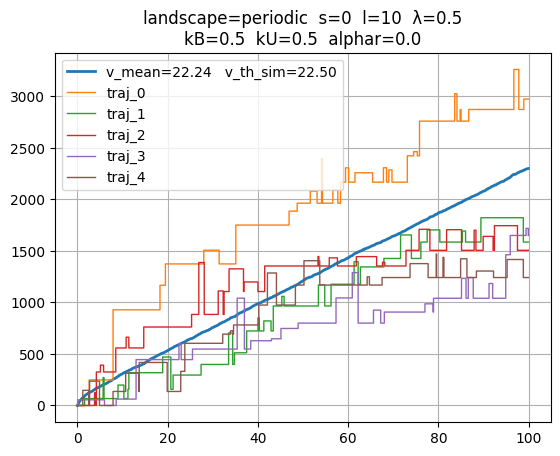

1.0 1.0


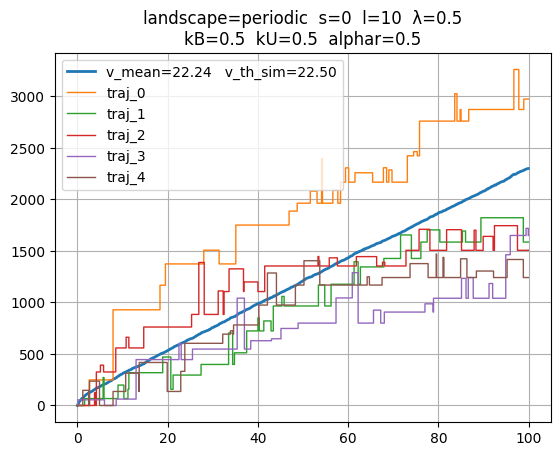

0.2223 0.22214449885080445


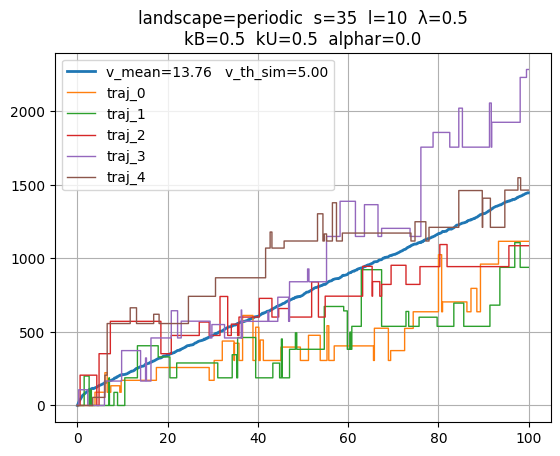

0.2223 0.4166083741381033


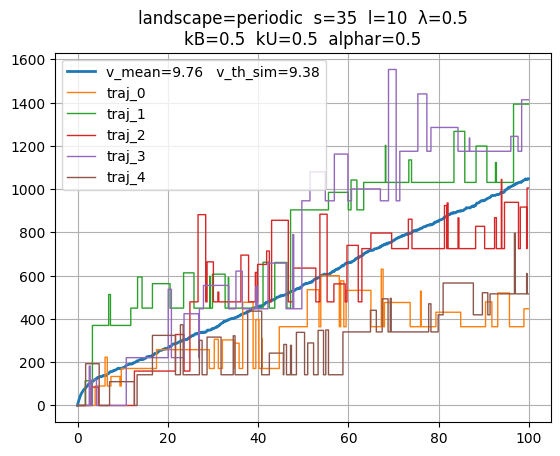

1.0 1.0


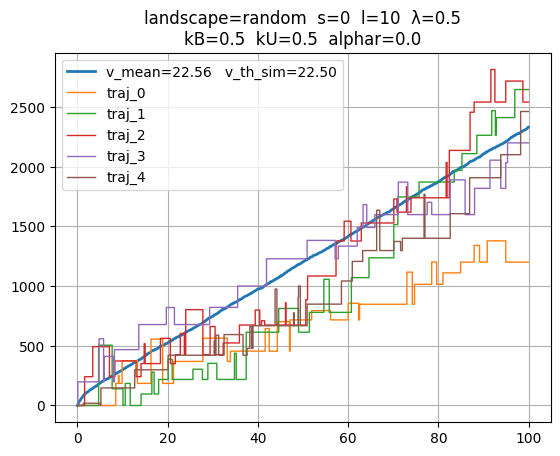

1.0 1.0


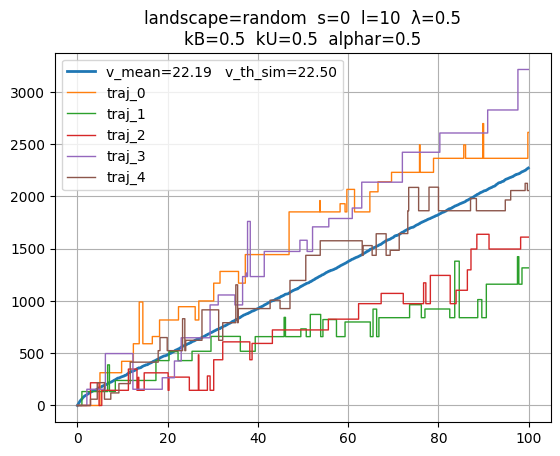

0.22230000000000003 0.2221365604512177


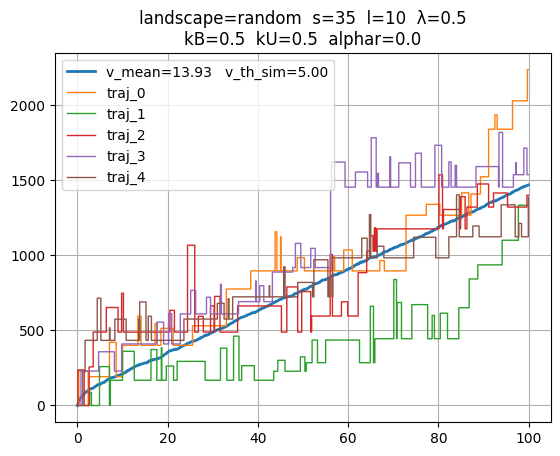

0.2223 0.41660265166930766


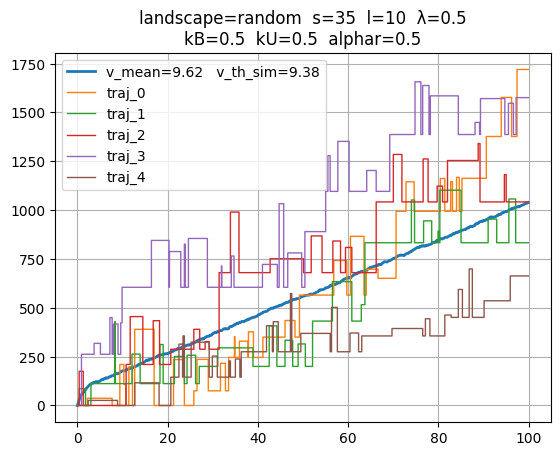

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path

# --- Load files ---
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-08__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]

df = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)

# --- Global parameters ---
Lmin = df["Lmin"][0]
Lmax = df["Lmax"][0]
bps  = df["bps"][0]
L = np.arange(Lmin, Lmax, bps)

tmax = df["tmax"][0]
dt   = df["dt"][0]
t    = np.arange(0, tmax, dt)

# --- Iterate directly over rows (each row = 1 simulation) ---

for row in df.iter_rows(named=True):

    # Extract values
    land_val = row["landscape"]
    s_val    = row["s"]
    l_val    = row["l"]
    lmbda_val = row["lmbda"]
    alphar_val = row["alphar"]

    # Arrays (stored compressed)
    t_matrix     = np.array(row["t_matrix"])
    x_matrix     = np.array(row["x_matrix"])
    results      = np.array(row["results"])
    results_mean = np.array(row["results_mean"])

    v_th_sim = row["v_th_sim"]
    v_mean   = row["v_mean"]
    kB       = row["kB"]
    kU       = row["kU"]

    alpha_mean   = np.mean(np.array(row["alpha_mean_p"]))
    alpha_mean_v = np.array(row["alpha_mean_v"])

    print(alpha_mean, alpha_mean_v)

    # --- Plot ---
    plt.figure()
    plt.title(
        f"landscape={land_val}  s={s_val}  l={l_val}  λ={lmbda_val}\n"
        f"kB={kB}  kU={kU}  alphar={alphar_val}"
    )

    plt.plot(t, results_mean, lw=2,
             label=f"v_mean={v_mean:.2f}   v_th_sim={v_th_sim:.2f}")

    n_traj = min(5, results.shape[0])
    for i in range(n_traj):
        plt.step(t, results[i], lw=1, where="post", label=f"traj_{i}")

    plt.grid(True)
    plt.legend()
    plt.show()


In [31]:
print(df)
# print(df["v_mean"])
# print(df["lmbda"])

shape: (12, 76)
┌───────────┬─────────────┬─────┬─────┬───┬───────────────┬───────────────┬───────────┬────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ xt_over_t     ┆ G             ┆ bound_low ┆ bound_high │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---           ┆ ---           ┆ ---       ┆ ---        │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ list[f64]     ┆ list[f64]     ┆ i64       ┆ i64        │
╞═══════════╪═════════════╪═════╪═════╪═══╪═══════════════╪═══════════════╪═══════════╪════════════╡
│ 3         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ [71.89,       ┆ [1.159878,    ┆ 5         ┆ 80         │
│           ┆             ┆     ┆     ┆   ┆ 80.315, …     ┆ 1.141277, …   ┆           ┆            │
│           ┆             ┆     ┆     ┆   ┆ 23.008819]    ┆ 0.22113…      ┆           ┆            │
│ 3         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ [71.89,       ┆ [1.159878,    ┆ 5         ┆ 80         │
│           ┆             ┆     ┆     ┆   ┆ 80.315, …     ┆ 1.141277, …   ┆

# .